In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from datetime import datetime

In [2]:
holiday_df=pd.read_csv('holidays_events.csv')
oil_df=pd.read_csv('oil.csv')
store_df=pd.read_csv('stores.csv')
train_df=pd.read_csv('train.csv')
trans_df=pd.read_csv('transactions.csv')
test_df=pd.read_csv('test.csv')

In [3]:
merged_df=train_df.merge(holiday_df, left_on = 'date', right_on = 'date', how = 'left')
merged_df=merged_df.merge(oil_df, left_on = 'date', right_on = 'date', how = 'left')
merged_df=merged_df.merge(store_df, left_on = 'store_nbr', right_on = 'store_nbr', how = 'left')
merged_df=merged_df.merge(trans_df, left_on = ['date', 'store_nbr'], right_on = ['date', 'store_nbr'], how = 'left')
merged_df

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0


In [4]:
merged_df['store_nbr']=merged_df['store_nbr'].astype('category')
merged_df['cluster']=merged_df['cluster'].astype('category')

In [5]:
merged_df=merged_df.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


In [6]:
merged_df['year']=pd.to_datetime(merged_df['date']).dt.year
merged_df['month']=pd.to_datetime(merged_df['date']).dt.month
merged_df['day']=pd.to_datetime(merged_df['date']).dt.day
merged_df['day_of_week']=pd.to_datetime(merged_df['date']).dt.day_name()

In [7]:
merged_df.loc[merged_df['date']=='2016-08-01']

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,dcoilwtico,city,state,store_type,cluster,transactions,year,month,day,day_of_week
2368278,2325510,2016-08-01,1,AUTOMOTIVE,3.000,0,NaN,NaN,NaN,NaN,...,40.05,Quito,Pichincha,D,13,1750.0,2016,8,1,Monday
2368279,2325511,2016-08-01,1,BABY CARE,0.000,0,NaN,NaN,NaN,NaN,...,40.05,Quito,Pichincha,D,13,1750.0,2016,8,1,Monday
2368280,2325512,2016-08-01,1,BEAUTY,3.000,0,NaN,NaN,NaN,NaN,...,40.05,Quito,Pichincha,D,13,1750.0,2016,8,1,Monday
2368281,2325513,2016-08-01,1,BEVERAGES,2418.000,10,NaN,NaN,NaN,NaN,...,40.05,Quito,Pichincha,D,13,1750.0,2016,8,1,Monday
2368282,2325514,2016-08-01,1,BOOKS,0.000,0,NaN,NaN,NaN,NaN,...,40.05,Quito,Pichincha,D,13,1750.0,2016,8,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370055,2327287,2016-08-01,9,POULTRY,680.387,1,NaN,NaN,NaN,NaN,...,40.05,Quito,Pichincha,B,6,2125.0,2016,8,1,Monday
2370056,2327288,2016-08-01,9,PREPARED FOODS,117.018,1,NaN,NaN,NaN,NaN,...,40.05,Quito,Pichincha,B,6,2125.0,2016,8,1,Monday
2370057,2327289,2016-08-01,9,PRODUCE,1778.860,3,NaN,NaN,NaN,NaN,...,40.05,Quito,Pichincha,B,6,2125.0,2016,8,1,Monday
2370058,2327290,2016-08-01,9,SCHOOL AND OFFICE SUPPLIES,7.000,0,NaN,NaN,NaN,NaN,...,40.05,Quito,Pichincha,B,6,2125.0,2016,8,1,Monday


In [29]:
trainp_df=merged_df.loc[merged_df['date']<'2016-08-01']
testp_df=merged_df.loc[merged_df['date']>='2016-08-01']
print(trainp_df.tail())
print(testp_df.head())

              id        date store_nbr                      family     sales  \
2368273  2325505  2016-07-31         9                     POULTRY   686.798   
2368274  2325506  2016-07-31         9              PREPARED FOODS   119.438   
2368275  2325507  2016-07-31         9                     PRODUCE  2252.286   
2368276  2325508  2016-07-31         9  SCHOOL AND OFFICE SUPPLIES     6.000   
2368277  2325509  2016-07-31         9                     SEAFOOD    48.562   

         onpromotion holiday_type locale locale_name description  ...  \
2368273            1          NaN    NaN         NaN         NaN  ...   
2368274            1          NaN    NaN         NaN         NaN  ...   
2368275            3          NaN    NaN         NaN         NaN  ...   
2368276            0          NaN    NaN         NaN         NaN  ...   
2368277            1          NaN    NaN         NaN         NaN  ...   

        dcoilwtico   city      state store_type cluster transactions  year  \
23

In [30]:
testp_df.drop(columns='transactions',inplace=True)
testp_df.head(1)

C:\Users\ynjn\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,year,month,day,day_of_week
2368278,2325510,2016-08-01,1,AUTOMOTIVE,3.0,0,NaN,NaN,NaN,NaN,NaN,40.05,Quito,Pichincha,D,13,2016,8,1,Monday


C:\Users\ynjn\AppData\Local\Temp/ipykernel_10088/1110340607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["ind"] = 1
C:\Users\ynjn\AppData\Local\Temp/ipykernel_10088/1110340607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["ind"] = a.groupby("store_nbr").ind.cumsum().values


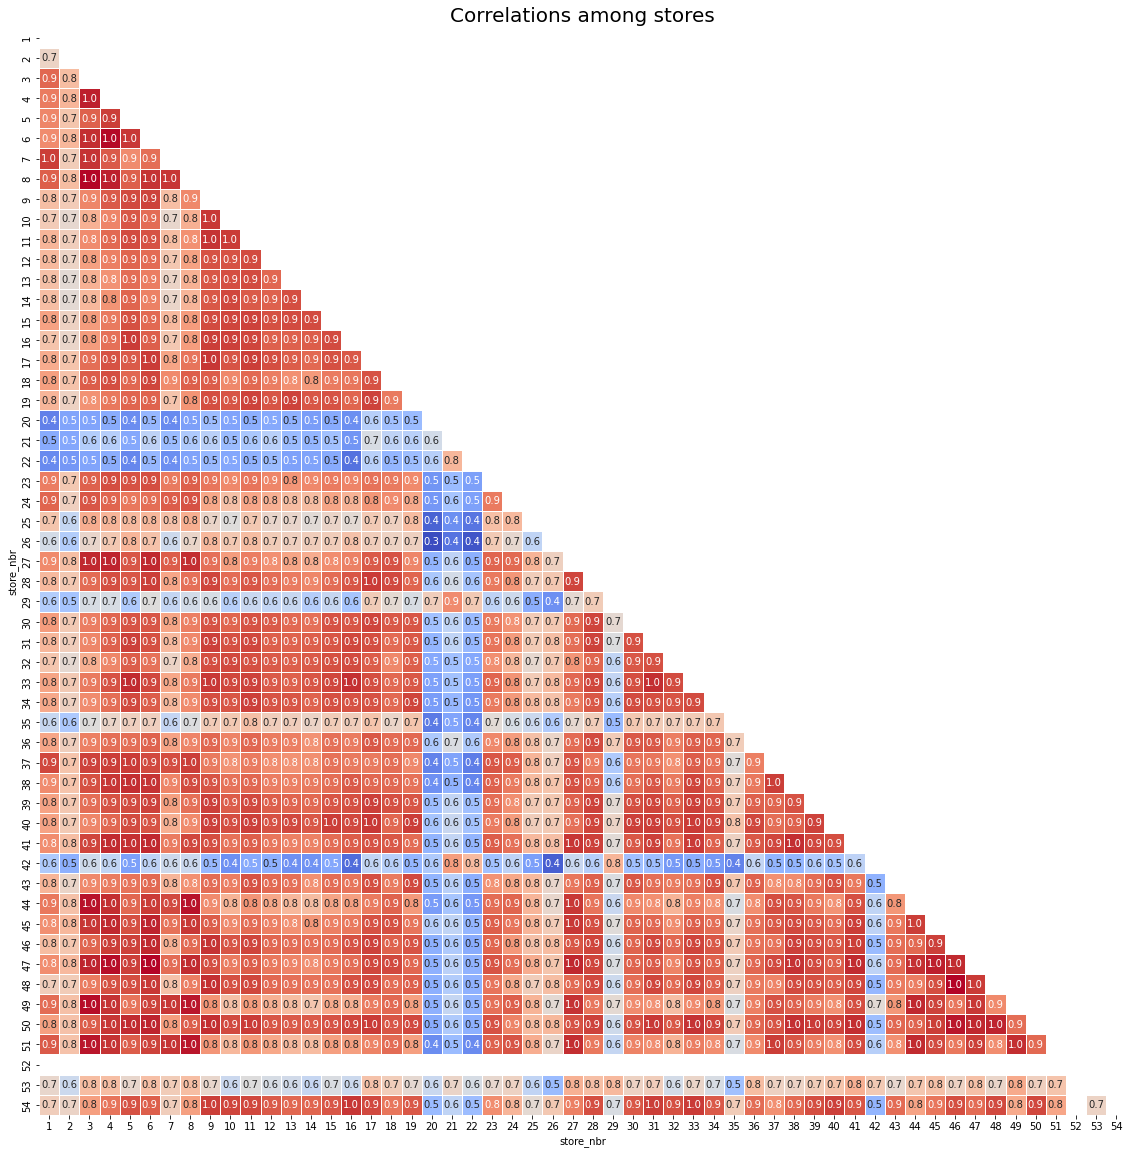

In [28]:
a = trainp_df[["store_nbr", "sales"]]
a["ind"] = 1
a["ind"] = a.groupby("store_nbr").ind.cumsum().values
a = pd.pivot(a, index = "ind", columns = "store_nbr", values = "sales").corr()
mask = np.triu(a.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(a,
        annot=True,
        fmt='.1f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)
plt.title("Correlations among stores",fontsize = 20)
plt.show()

In [59]:
groups = trainp_df.groupby(['store_type','cluster','store_nbr']).median()
groups.dropna(axis=0,inplace=True)
groups['sales']

store_type  cluster  store_nbr
A           5        44           63.000000
            11       45           51.000000
                     49           39.000000
            14       46           31.000000
                     47           42.000000
                     48           25.622000
                     50           27.000000
            17       51           22.000000
B           6        9            16.000000
                     11           13.000000
                     20            0.000000
                     21            0.000000
                     34            8.000000
                     39           14.000000
            10       31            8.000000
            16       18           10.000000
C           3        16            6.000000
                     30            4.000000
                     32            2.000000
                     33            7.000000
                     35            3.000000
                     40            7.000000
 

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

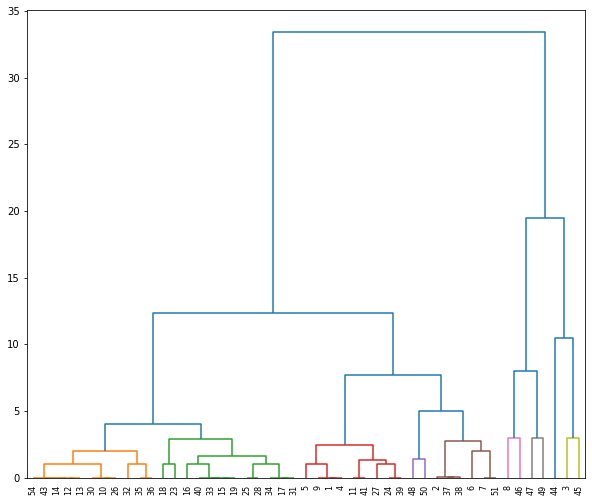

In [20]:
stores_df=trainp_df[['store_nbr','sales']]
stores_df.set_index('store_nbr',inplace=True)
stores_df=stores_df.apply(lambda x: x.astype('float64'))
stores_df=stores_df.groupby('store_nbr').median()
index_st=stores_df[stores_df['sales']==0].index
stores_df=stores_df.drop(index_st)

Z = linkage(stores_df, method='average')

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.23)
#plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
#plt.xlabel('Company')
dendrogram(Z, labels=stores_df.index, color_threshold=3.6)
plt.axhline(y=200, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

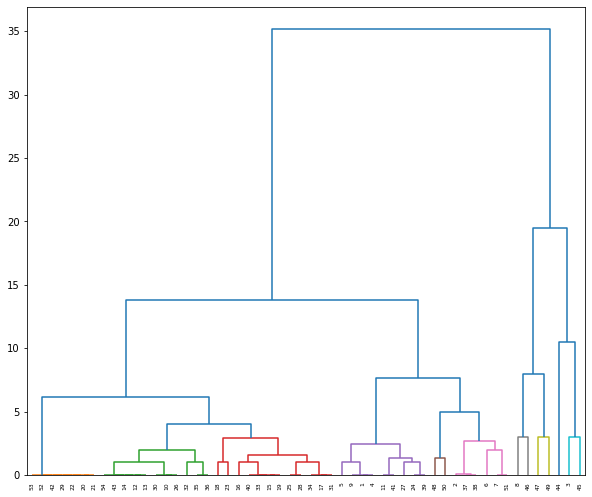

In [31]:
stores_df=trainp_df[['store_nbr','sales']]
stores_df.set_index('store_nbr',inplace=True)
stores_df=stores_df.apply(lambda x: x.astype('float64'))
stores_df=stores_df.groupby('store_nbr').median()

Z = linkage(stores_df, method='average')

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.23)
#plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
#plt.xlabel('Company')
dendrogram(Z, labels=stores_df.index, color_threshold=3.6)
plt.axhline(y=200, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


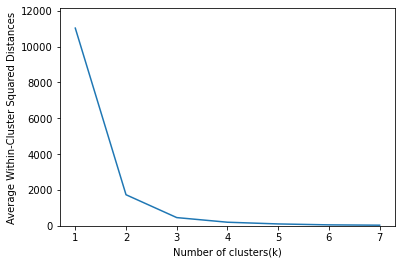

In [55]:
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(stores_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 8), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [50]:
stores_df

,sales
store_nbr,
1,16.000000
2,20.000000
3,54.000000
4,16.000000
5,17.000000
6,24.000000
7,22.000000
8,34.000000
9,16.000000


In [ ]:
#change_value_dict=['44':1,'43':1,'3':1,'47':1,'6':2,'7':2,'9':2,]


In [32]:
memb=fcluster(linkage(stores_df, method='average'),4,criterion='maxclust')
stores_df['store_cl']=memb
stores_df

,sales,store_cl
store_nbr,,
1,16.000000,2
2,20.000000,2
3,54.000000,4
4,16.000000,2
5,17.000000,2
6,24.000000,2
7,22.000000,2
8,34.000000,3
9,16.000000,2


In [68]:
#trainp_df.drop(columns=['store_cl_x','store_cl_y'],inplace=True)

In [33]:
trainp_df=trainp_df.merge(stores_df.drop(columns='sales'), left_on = 'store_nbr', right_on = 'store_nbr', how = 'left')
trainp_df.drop(columns=['store_nbr','store_type','cluster'],inplace=True)
trainp_df['store_cl']=trainp_df['store_cl'].astype('category')
trainp_df.head()

,id,date,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,transactions,year,month,day,day_of_week,store_cl
0,0,2013-01-01,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,NaN,2013,1,1,Tuesday,2
1,1,2013-01-01,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,NaN,2013,1,1,Tuesday,2
2,2,2013-01-01,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,NaN,2013,1,1,Tuesday,2
3,3,2013-01-01,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,NaN,2013,1,1,Tuesday,2
4,4,2013-01-01,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,NaN,2013,1,1,Tuesday,2


In [34]:
testp_df=testp_df.merge(stores_df.drop(columns='sales'), left_on = 'store_nbr', right_on = 'store_nbr', how = 'left')
testp_df.drop(columns=['store_nbr','store_type','cluster'],inplace=True)
testp_df['store_cl']=testp_df['store_cl'].astype('category')
testp_df.head()

,id,date,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,year,month,day,day_of_week,store_cl
0,2325510,2016-08-01,AUTOMOTIVE,3.0,0,NaN,NaN,NaN,NaN,NaN,40.05,Quito,Pichincha,2016,8,1,Monday,2
1,2325511,2016-08-01,BABY CARE,0.0,0,NaN,NaN,NaN,NaN,NaN,40.05,Quito,Pichincha,2016,8,1,Monday,2
2,2325512,2016-08-01,BEAUTY,3.0,0,NaN,NaN,NaN,NaN,NaN,40.05,Quito,Pichincha,2016,8,1,Monday,2
3,2325513,2016-08-01,BEVERAGES,2418.0,10,NaN,NaN,NaN,NaN,NaN,40.05,Quito,Pichincha,2016,8,1,Monday,2
4,2325514,2016-08-01,BOOKS,0.0,0,NaN,NaN,NaN,NaN,NaN,40.05,Quito,Pichincha,2016,8,1,Monday,2


<AxesSubplot:xlabel='city'>

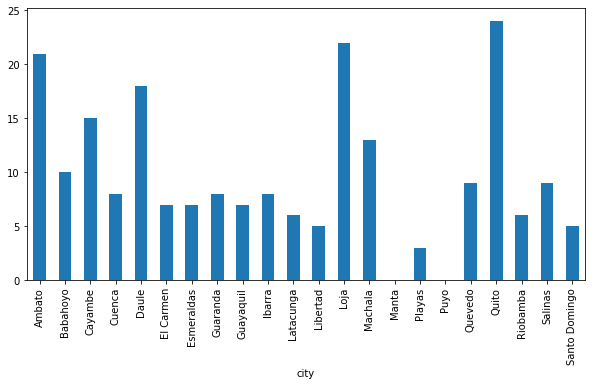

In [73]:
plt.rcParams['figure.figsize'] = [10, 5]
a = merged_df.groupby("city").sales.median()
a.plot.bar()

<AxesSubplot:xlabel='state'>

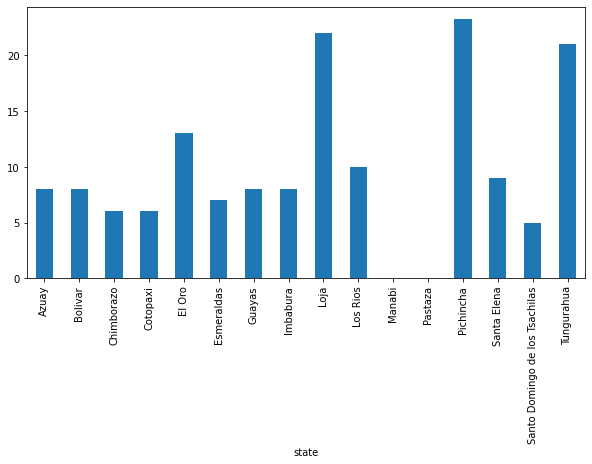

In [74]:
plt.rcParams['figure.figsize'] = [10, 5]
a = merged_df.groupby("state").sales.median()
a.plot.bar()

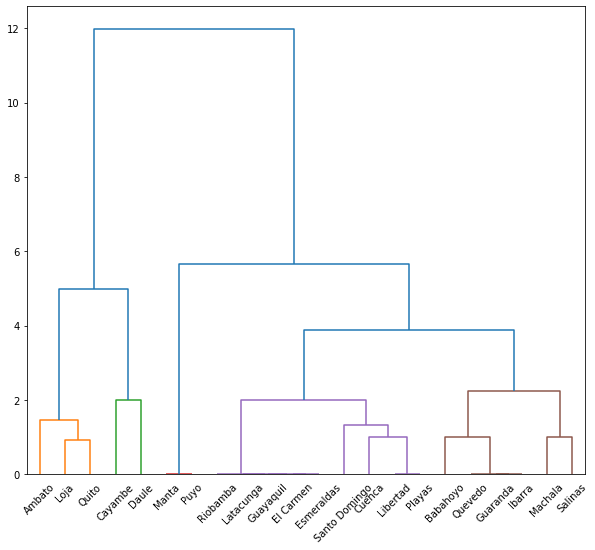

In [35]:
cities_df=trainp_df[['city','sales']]
cities_df.set_index('city',inplace=True)
cities_df=cities_df.apply(lambda x: x.astype('float64'))
cities_df=cities_df.groupby('city').median()

Z = linkage(cities_df, method='average')

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.23)
#plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
#plt.xlabel('Company')
dendrogram(Z, labels=cities_df.index, color_threshold=3.6)
plt.axhline(y=200, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


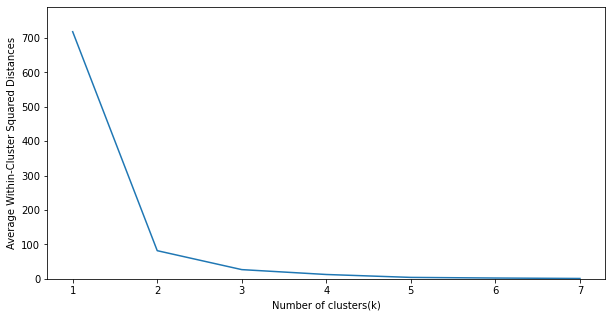

In [78]:
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(cities_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 8), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [36]:
memb=fcluster(linkage(cities_df, method='average'),4,criterion='maxclust')
cities_df['city_cl']=memb
cities_df

,sales,city_cl
city,,
Ambato,18.000000,1
Babahoyo,8.000000,4
Cayambe,13.000000,2
Cuenca,4.000000,4
Daule,15.000000,2
El Carmen,5.000000,4
Esmeraldas,5.000000,4
Guaranda,7.000000,4
Guayaquil,5.000000,4


In [37]:
trainp_df=trainp_df.merge(cities_df.drop(columns='sales'), left_on = 'city', right_on = 'city', how = 'left')
trainp_df.drop(columns=['city'],inplace=True)
trainp_df['city_cl']=trainp_df['city_cl'].astype('category')
trainp_df.head()

,id,date,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,state,transactions,year,month,day,day_of_week,store_cl,city_cl
0,0,2013-01-01,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Pichincha,NaN,2013,1,1,Tuesday,2,1
1,1,2013-01-01,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Pichincha,NaN,2013,1,1,Tuesday,2,1
2,2,2013-01-01,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Pichincha,NaN,2013,1,1,Tuesday,2,1
3,3,2013-01-01,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Pichincha,NaN,2013,1,1,Tuesday,2,1
4,4,2013-01-01,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Pichincha,NaN,2013,1,1,Tuesday,2,1


In [38]:
testp_df=testp_df.merge(cities_df.drop(columns='sales'), left_on = 'city', right_on = 'city', how = 'left')
testp_df.drop(columns=['city'],inplace=True)
testp_df['city_cl']=testp_df['city_cl'].astype('category')
testp_df.head()

,id,date,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,state,year,month,day,day_of_week,store_cl,city_cl
0,2325510,2016-08-01,AUTOMOTIVE,3.0,0,NaN,NaN,NaN,NaN,NaN,40.05,Pichincha,2016,8,1,Monday,2,1
1,2325511,2016-08-01,BABY CARE,0.0,0,NaN,NaN,NaN,NaN,NaN,40.05,Pichincha,2016,8,1,Monday,2,1
2,2325512,2016-08-01,BEAUTY,3.0,0,NaN,NaN,NaN,NaN,NaN,40.05,Pichincha,2016,8,1,Monday,2,1
3,2325513,2016-08-01,BEVERAGES,2418.0,10,NaN,NaN,NaN,NaN,NaN,40.05,Pichincha,2016,8,1,Monday,2,1
4,2325514,2016-08-01,BOOKS,0.0,0,NaN,NaN,NaN,NaN,NaN,40.05,Pichincha,2016,8,1,Monday,2,1


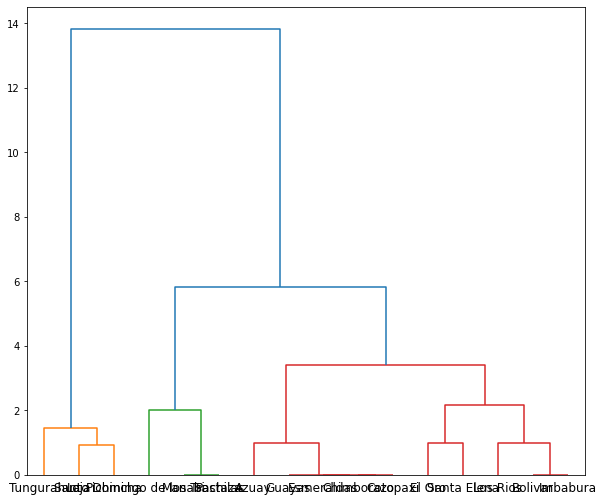

In [39]:
states_df=trainp_df[['state','sales']]
states_df.set_index('state',inplace=True)
states_df=states_df.groupby('state').median()

Z = linkage(states_df, method='average')

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.23)
#plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
#plt.xlabel('Company')
dendrogram(Z, labels=states_df.index, color_threshold=3.6)
plt.axhline(y=200, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


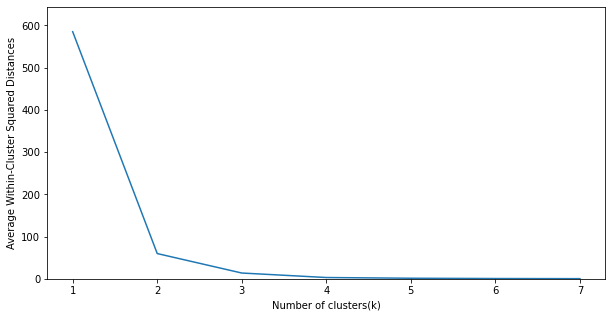

In [83]:
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(states_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 8), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [40]:
memb=fcluster(linkage(states_df, method='average'),3,criterion='maxclust')
states_df['state_cl']=memb
states_df

,sales,state_cl
state,,
Azuay,4.000000,3
Bolivar,7.000000,3
Chimborazo,5.000000,3
Cotopaxi,5.000000,3
El Oro,10.000000,3
Esmeraldas,5.000000,3
Guayas,5.000000,3
Imbabura,7.000000,3
Loja,19.928001,1


In [41]:
trainp_df=trainp_df.merge(states_df.drop(columns='sales'), left_on = 'state', right_on = 'state', how = 'left')
trainp_df.drop(columns=['state'],inplace=True)
trainp_df['state_cl']=trainp_df['state_cl'].astype('category')
trainp_df.head()

,id,date,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,transactions,year,month,day,day_of_week,store_cl,city_cl,state_cl
0,0,2013-01-01,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,2013,1,1,Tuesday,2,1,1
1,1,2013-01-01,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,2013,1,1,Tuesday,2,1,1
2,2,2013-01-01,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,2013,1,1,Tuesday,2,1,1
3,3,2013-01-01,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,2013,1,1,Tuesday,2,1,1
4,4,2013-01-01,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,2013,1,1,Tuesday,2,1,1


In [42]:
testp_df=testp_df.merge(states_df.drop(columns='sales'), left_on = 'state', right_on = 'state', how = 'left')
testp_df.drop(columns=['state'],inplace=True)
testp_df['state_cl']=testp_df['state_cl'].astype('category')
testp_df.head()

,id,date,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day,day_of_week,store_cl,city_cl,state_cl
0,2325510,2016-08-01,AUTOMOTIVE,3.0,0,NaN,NaN,NaN,NaN,NaN,40.05,2016,8,1,Monday,2,1,1
1,2325511,2016-08-01,BABY CARE,0.0,0,NaN,NaN,NaN,NaN,NaN,40.05,2016,8,1,Monday,2,1,1
2,2325512,2016-08-01,BEAUTY,3.0,0,NaN,NaN,NaN,NaN,NaN,40.05,2016,8,1,Monday,2,1,1
3,2325513,2016-08-01,BEVERAGES,2418.0,10,NaN,NaN,NaN,NaN,NaN,40.05,2016,8,1,Monday,2,1,1
4,2325514,2016-08-01,BOOKS,0.0,0,NaN,NaN,NaN,NaN,NaN,40.05,2016,8,1,Monday,2,1,1


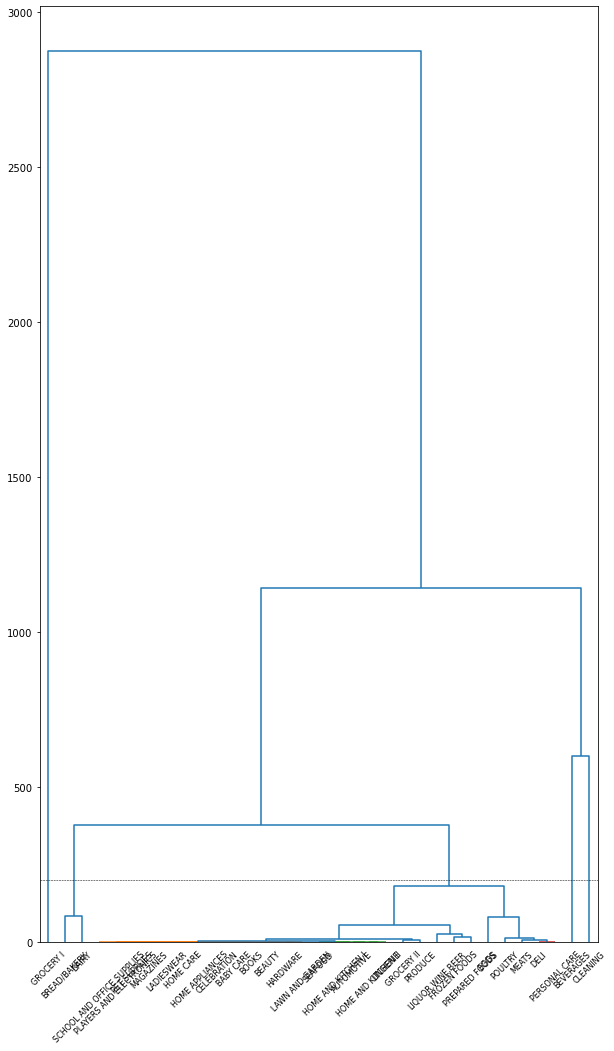

In [43]:
families_df=trainp_df[['family','sales']]
families_df.set_index('family',inplace=True)
families_df=families_df.groupby('family').median()

Z = linkage(families_df, method='average')

fig = plt.figure(figsize=(10, 20))
fig.subplots_adjust(bottom=0.23)
#plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
#plt.xlabel('Company')
dendrogram(Z, labels=families_df.index, color_threshold=3.6)
plt.axhline(y=200, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


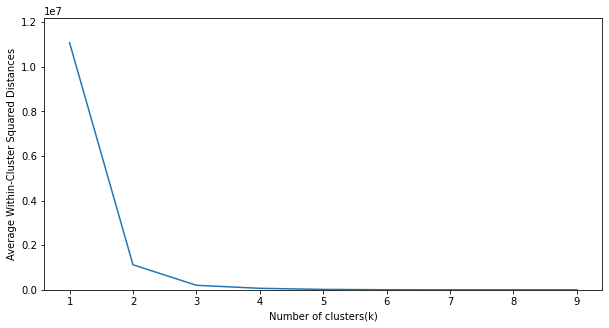

In [89]:
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(families_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [44]:
memb=fcluster(linkage(families_df, method='average'),6,criterion='maxclust')
families_df['family_cl']=memb
families_df

,sales,family_cl
family,,
AUTOMOTIVE,4.0000,2
BABY CARE,0.0000,2
BEAUTY,2.0000,2
BEVERAGES,1512.0000,4
BOOKS,0.0000,2
BREAD/BAKERY,380.0700,1
CELEBRATION,0.0000,2
CLEANING,912.0000,5
DAIRY,467.0000,1


In [46]:
trainp_df=trainp_df.merge(families_df.drop(columns='sales'), left_on = 'family', right_on = 'family', how = 'left')
trainp_df.drop(columns=['family'],inplace=True)
trainp_df['family_cl']=trainp_df['family_cl'].astype('category')
trainp_df.head()

,id,date,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,transactions,year,month,day,day_of_week,store_cl,city_cl,state_cl,family_cl
0,0,2013-01-01,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,2013,1,1,Tuesday,2,1,1,2
1,1,2013-01-01,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,2013,1,1,Tuesday,2,1,1,2
2,2,2013-01-01,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,2013,1,1,Tuesday,2,1,1,2
3,3,2013-01-01,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,2013,1,1,Tuesday,2,1,1,4
4,4,2013-01-01,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,2013,1,1,Tuesday,2,1,1,2


In [45]:
testp_df=testp_df.merge(families_df.drop(columns='sales'), left_on = 'family', right_on = 'family', how = 'left')
testp_df.drop(columns=['family'],inplace=True)
testp_df['family_cl']=testp_df['family_cl'].astype('category')
testp_df.head()

,id,date,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day,day_of_week,store_cl,city_cl,state_cl,family_cl
0,2325510,2016-08-01,3.0,0,NaN,NaN,NaN,NaN,NaN,40.05,2016,8,1,Monday,2,1,1,2
1,2325511,2016-08-01,0.0,0,NaN,NaN,NaN,NaN,NaN,40.05,2016,8,1,Monday,2,1,1,2
2,2325512,2016-08-01,3.0,0,NaN,NaN,NaN,NaN,NaN,40.05,2016,8,1,Monday,2,1,1,2
3,2325513,2016-08-01,2418.0,10,NaN,NaN,NaN,NaN,NaN,40.05,2016,8,1,Monday,2,1,1,4
4,2325514,2016-08-01,0.0,0,NaN,NaN,NaN,NaN,NaN,40.05,2016,8,1,Monday,2,1,1,2


In [47]:
trainp_df['dcoilwtico']=trainp_df['dcoilwtico'].interpolate()

In [48]:
testp_df['dcoilwtico']=testp_df['dcoilwtico'].interpolate()

In [49]:
trainp_df['dcoilwtico']=trainp_df['dcoilwtico'].fillna(method='bfill')

In [50]:
testp_df['dcoilwtico']=testp_df['dcoilwtico'].fillna(method='bfill')

In [96]:
for col in trainp_df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (trainp_df[col].isnull().sum() / trainp_df[col].shape[0]))
    print(msg)

column:         id	 Percent of NaN value: 0.00%
column:       date	 Percent of NaN value: 0.00%
column:      sales	 Percent of NaN value: 0.00%
column: onpromotion	 Percent of NaN value: 0.00%
column: holiday_type	 Percent of NaN value: 83.22%
column:     locale	 Percent of NaN value: 83.22%
column: locale_name	 Percent of NaN value: 83.22%
column: description	 Percent of NaN value: 83.22%
column: transferred	 Percent of NaN value: 83.22%
column: dcoilwtico	 Percent of NaN value: 0.00%
column: transactions	 Percent of NaN value: 9.82%
column:       year	 Percent of NaN value: 0.00%
column:      month	 Percent of NaN value: 0.00%
column:        day	 Percent of NaN value: 0.00%
column: day_of_week	 Percent of NaN value: 0.00%
column:   store_cl	 Percent of NaN value: 0.00%
column:    city_cl	 Percent of NaN value: 0.00%
column:   state_cl	 Percent of NaN value: 0.00%
column:  family_cl	 Percent of NaN value: 0.00%


In [51]:
trainp_df.drop(columns=['id','locale_name','description','transferred','transactions'],inplace=True)

In [52]:
testp_df.drop(columns=['id','locale_name','description','transferred'],inplace=True)

<AxesSubplot:xlabel='day'>

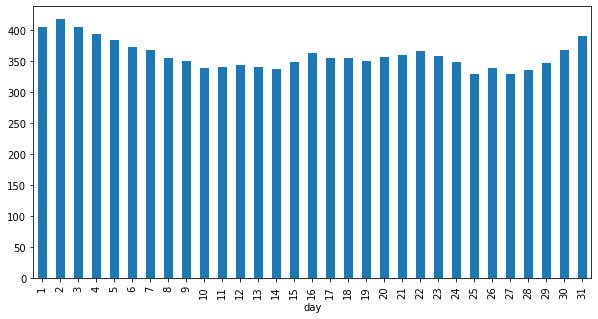

In [98]:
plt.rcParams['figure.figsize'] = [10, 5]
a = merged_df.groupby("day").sales.mean()
a.plot.bar()

<AxesSubplot:xlabel='day', ylabel='sales'>

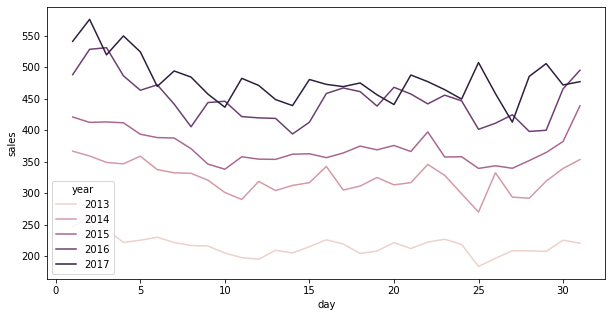

In [101]:
sns.lineplot(x='day',y='sales',data=merged_df,ci=None,estimator='mean', hue='year')

In [100]:
a

day
1     405.071022
2     417.215220
3     403.996987
4     392.806938
5     383.753451
6     373.058368
7     368.309703
8     353.984200
9     349.662292
10    338.839988
11    340.449240
12    343.290858
13    339.679481
14    337.413433
15    348.736707
16    361.994265
17    355.430894
18    355.415713
19    350.475743
20    356.924431
21    358.989324
22    366.682943
23    357.681688
24    347.533632
25    328.477716
26    338.253133
27    328.873539
28    334.628604
29    345.823234
30    367.362023
31    389.542013
Name: sales, dtype: float64

In [53]:
trainp_df['day'].replace(['1','2','3','4','5','6','7','30','31'],'1',inplace=True)
trainp_df['day'].replace(['8','16','17','18','19','20','21','22','23'],'2',inplace=True)
trainp_df['day'].replace(['9','10','11','12','13','14','15','24','25','26','27','28','29'],'3',inplace=True)

In [54]:
testp_df['day'].replace(['1','2','3','4','5','6','7','30','31'],'1',inplace=True)
testp_df['day'].replace(['8','16','17','18','19','20','21','22','23'],'2',inplace=True)
testp_df['day'].replace(['9','10','11','12','13','14','15','24','25','26','27','28','29'],'3',inplace=True)

In [55]:
trainp_df.drop(columns=['year'],inplace=True)

In [56]:
testp_df.drop(columns=['year'],inplace=True)

In [107]:
for col in trainp_df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (trainp_df[col].isnull().sum() / trainp_df[col].shape[0]))
    print(msg)

column:       date	 Percent of NaN value: 0.00%
column:      sales	 Percent of NaN value: 0.00%
column: onpromotion	 Percent of NaN value: 0.00%
column: holiday_type	 Percent of NaN value: 83.22%
column:     locale	 Percent of NaN value: 83.22%
column: dcoilwtico	 Percent of NaN value: 0.00%
column:      month	 Percent of NaN value: 0.00%
column:        day	 Percent of NaN value: 0.00%
column: day_of_week	 Percent of NaN value: 0.00%
column:   store_cl	 Percent of NaN value: 0.00%
column:    city_cl	 Percent of NaN value: 0.00%
column:   state_cl	 Percent of NaN value: 0.00%
column:  family_cl	 Percent of NaN value: 0.00%


In [57]:
trainp_df.columns

Index(['date', 'sales', 'onpromotion', 'holiday_type', 'locale', 'dcoilwtico',
       'month', 'day', 'day_of_week', 'store_cl', 'city_cl', 'state_cl',
       'family_cl'],
      dtype='object')

In [60]:
trainp_df['month']=trainp_df['month'].astype('category')
trainp_df['day_of_week']=trainp_df['day_of_week'].astype('category')

testp_df['month']=testp_df['month'].astype('category')
testp_df['day_of_week']=testp_df['day_of_week'].astype('category')

In [63]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge

In [69]:
predictors=[ 'holiday_type', 'dcoilwtico',
       'month', 'day_of_week', 'store_cl', 'city_cl', 'state_cl',
       'family_cl']
outcome=['sales']

train_X = pd.get_dummies(trainp_df[predictors], drop_first=True)
train_y = trainp_df[outcome]
valid_X = pd.get_dummies(testp_df[predictors], drop_first=True)
valid_y = testp_df[outcome]

sale_lm = LinearRegression()
sale_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', sale_lm.intercept_)
print(pd.DataFrame({'Predictor': trainp_df.columns, 'coefficient': sale_lm.coef_}))

# print performance measures
regressionSummary(train_y, sale_lm.predict(train_X))

intercept  [579.12742605]


ValueError: Data must be 1-dimensional

In [109]:
#trainp_df=pd.get_dummies(trainp_df,columns=['holiday_type','locale','month','day_of_week','store_cl','city_cl','state_cl','family_cl'],drop_first=True)

In [120]:
#testp_df=pd.get_dummies(testp_df,columns=['holiday_type','locale','month','day_of_week','store_cl','city_cl','state_cl','family_cl'],drop_first=True)

In [ ]:
#train_y=trainp_df['sales']
#train_X=trainp_df.drop(columns='sales')


In [121]:
#trainp_df

,date,sales,onpromotion,dcoilwtico,day,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer,...,city_cl_4,state_cl_1,state_cl_2,state_cl_3,family_cl_1,family_cl_2,family_cl_3,family_cl_4,family_cl_5,family_cl_6
0,2013-01-01,0.000,0,93.14,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,2013-01-01,0.000,0,93.14,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,2013-01-01,0.000,0,93.14,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,2013-01-01,0.000,0,93.14,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,2013-01-01,0.000,0,93.14,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368273,2016-07-31,686.798,1,41.54,31,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2368274,2016-07-31,119.438,1,41.54,31,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2368275,2016-07-31,2252.286,3,41.54,31,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2368276,2016-07-31,6.000,0,41.54,31,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
